<a href="https://colab.research.google.com/github/tgusmao/programacao_ds/blob/master/TrabalhoPratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Pr√°tico de Programa√ß√£o para Ci√™ncias de Dados**

Dupla: 
*   Tammy Hikari Yanai Gusm√£o
*   Thalita Naiara Andre Alves


Trabalho Pr√°tico para obten√ß√£o de nota na disciplina de Programa√ß√£o para Ci√™ncias de Dados - Turma 1 de 2020.

##Instala√ß√µes e Importa√ß√µes Utilzadas

In [ ]:
!pip install geopandas

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample
import string
import re
import time
#import nltk
from tabulate import tabulate
import collections
import geopandas as gpd
from geopandas import GeoDataFrame

##Importa√ß√£o da Base de Dados

Iniciando abaixo a leitura do arquivo CSV local (localizado no Google Drive)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_original = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/dados-curso-completo.csv', sep = ',', skiprows = 0, encoding = 'utf-8')

In [5]:
#c√≥pia da base original
df_copia_original = df_original.copy()

##Resumo do dataset original



A base de dados cont√©m informa√ß√µes sobre tu√≠tes sobre a COVID-19, postados durante o primeiro semestre do ano de 2020. A base foi levemente pr√©-processada anteriormente pelo professor da disciplina.  

In [ ]:
print('Quantidade de linhas:', df_original.shape[0])
print('Quantidade de colunas:', df_original.shape[1])

Quantidade de linhas: 1658825
Quantidade de colunas: 13


Como pode ser visto acima, o atributo *shape* retornou uma tupla contendo a quantidade de linhas e colunas que constituem a base: 1.658.825 linhas e 13 colunas. 

Abaixo observamos uma tabela contendo os nomes das colunas, os tipos preponderantes em cada uma delas, e as quantidades de valores nulos e n√£o nulos. 

In [ ]:
colunas = []

for col in df_original.columns:
  colunas.append(col)

In [ ]:
qntd_nulos = []
lista_nulos = df_original.isnull().sum()

for x in lista_nulos:
  qntd_nulos.append(x)

In [ ]:
qntd_nao_nulos = []
lista_nao_nulos = df_original.notnull().sum()

for x in lista_nao_nulos:
  qntd_nao_nulos.append(x)

In [ ]:
dados = {'colunas': colunas,
         'tipos': df_original.dtypes,
         'qntd_nulos': qntd_nulos,
         'qntd_nao_nulos': qntd_nao_nulos}

In [ ]:
resumo_dataset = pd.DataFrame (dados, columns = ['colunas','tipos', 'qntd_nulos', 'qntd_nao_nulos']).reset_index(drop=True)

In [ ]:
print(tabulate(resumo_dataset, headers = 'keys', tablefmt = 'psql')) 

+----+------------+---------+--------------+------------------+
|    | colunas    | tipos   |   qntd_nulos |   qntd_nao_nulos |
|----+------------+---------+--------------+------------------|
|  0 | data       | object  |            0 |          1658825 |
|  1 | usuario    | object  |           57 |          1658768 |
|  2 | apelido    | object  |            0 |          1658825 |
|  3 | texto      | object  |            0 |          1658825 |
|  4 | retweet    | int64   |            0 |          1658825 |
|  5 | seguidores | int64   |            0 |          1658825 |
|  6 | idioma     | object  |            0 |          1658825 |
|  7 | lugar      | object  |      1584220 |            74605 |
|  8 | pais       | object  |      1584225 |            74600 |
|  9 | sigla      | object  |      1584230 |            74595 |
| 10 | latitude   | float64 |      1650105 |             8720 |
| 11 | longitude  | float64 |      1650105 |             8720 |
| 12 | hashtags   | object  |           

Os tipos de vari√°veis que consistem o dataframe s√£o *object* (string), *int64* (n√∫mero inteiro) e *float64* (n√∫mero real). Dados relativos a data, *username*, nome de perfil, tweet, pa√≠s, sigla e lugar s√£o informa√ß√µes textuais. As colunas retweet e seguidores possuem dados quantitativos cujo menor valor √© zero.Latitude e longitude s√£o referentes as coordenadas geogr√°ficas, portanto, representados por n√∫meros reais. 

Levando em considera√ß√£o o achado acima, faz-se necess√°rio o preenchimento apropriado para eliminar os espa√ßos vazios presentes no dataset. Esta atividade √© realizada na se√ß√£o seguinte (Tratamento de Dados).

Para uma perspectiva visual da caracter√≠stica quantitativa dos atributos, foram plotados os gr√°ficos a seguir:

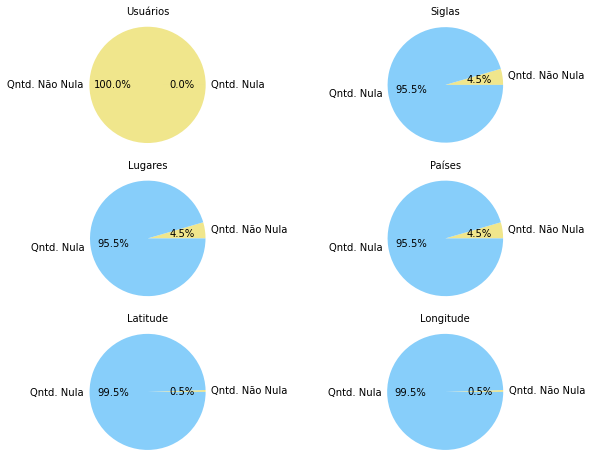

In [ ]:
#Gera pie charts para quantidades nulas e n√£o nulas para as colunas:
#usuario, sigla, lugar, pais, latitude e longitude

fig, eixos = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

eixos[0,0].pie([df_original.usuario.notnull().sum(), df_original.usuario.isnull().sum()], 
             labels = ['Qntd. N√£o Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,0].set_title('Usu√°rios',  fontsize=10)
eixos[0,0].axis('equal')


eixos[0,1].pie([df_original.sigla.notnull().sum(), df_original.sigla.isnull().sum()], 
             labels = ['Qntd. N√£o Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,1].set_title('Siglas',  fontsize=10)
eixos[0,1].axis('equal')

eixos[1,0].pie([df_original.lugar.notnull().sum(), df_original.lugar.isnull().sum()], 
             labels = ['Qntd. N√£o Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,0].set_title('Lugares',  fontsize=10)
eixos[1,0].axis('equal')

eixos[1,1].pie([df_original.pais.notnull().sum(), df_original.pais.isnull().sum()], 
             labels = ['Qntd. N√£o Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,1].set_title('Pa√≠ses',  fontsize=10)
eixos[1,1].axis('equal')

eixos[2,0].pie([df_original.latitude.notnull().sum(), df_original.latitude.isnull().sum()], 
             labels = ['Qntd. N√£o Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,0].set_title('Latitude',  fontsize=10)
eixos[2,0].axis('equal')

eixos[2,1].pie([df_original.longitude.notnull().sum(), df_original.longitude.isnull().sum()], 
             labels = ['Qntd. N√£o Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,1].set_title('Longitude',  fontsize=10)
eixos[2,1].axis('equal')

# Ajusta o espa√ßo entre os dois gr√°ficos
plt.subplots_adjust(wspace=1)
plt.savefig('piechar_nulos_naoNulos.png')
#plt.legend(loc='lower left')
plt.show()

*idioma*, *sigla*, *pais* e *lugar* s√£o atributos categr√≥ricos, isto √©, caracterizam o tweet e/ou o usu√°rio que postou o tweet. Como n√£o houve restri√ß√£o na coleta dedados quanto a localiza√ß√£o e idioma, o dataset possui tweets do mundo todo como pode ser observado nas estat√≠sticas abaixo, que apresentam os dez primeiros itens com maiores ocorr√™ncias:

In [6]:
def get_df_itens_por_coluna(df, nome_coluna):
  return df[nome_coluna].value_counts().to_frame()

In [7]:
def set_nome_coluna(df, coluna_antiga, coluna_nova):
  return df.rename(columns = {coluna_antiga:coluna_nova})

In [8]:
def calcula_df_porcentagem (df, nome_coluna, tam):
  return round(((df[nome_coluna] * 100)/tam), 2)

In [9]:
#col_principal = coluna principal
#nova_col_1 = nome da nova coluna que conter√° os valores da col_principal
#nova_col_2 = nome da coluna que conter√° os valores do index
#coluna4 = qualquer nome de coluna para guardar porcentagens

def organiza_itens_unicos(df, col_principal, nova_col_1, nova_col_2, coluna4 = 'porcentagem'):

  #lista = df[col_principal].value_counts().to_frame()
  lista = get_df_itens_por_coluna(df, col_principal)
  lista = set_nome_coluna(lista, col_principal, nova_col_1)
  lista[coluna4] =  calcula_df_porcentagem(lista, nova_col_1, df.shape[0])
  lista[nova_col_2] = lista.index

  return lista.reset_index(drop=True)

Em rela√ß√£o aos idiomas presentes, temos as seguintes coloca√ß√µes:

In [ ]:
#pd.pivot_table(l_idiomas,values='qntd_idioma', index=['sigla_idioma'], aggfunc = np.sum)

In [10]:
def get_item_unico_cont(_df, nome_coluna):
  unique_elements, counts_elements = np.unique(_df[nome_coluna], return_counts=True)
  df = pd.DataFrame({nome_coluna: unique_elements,
                     'qntd': counts_elements})
  return df

In [ ]:
l_idiomas = get_item_unico_cont(df_original, 'idioma')
l_idiomas['porcentagem'] = calcula_df_porcentagem(l_idiomas, 'qntd', df_original.shape[0])
l_idiomas.sort_values(by = 'porcentagem', ascending = False, inplace=True) 

In [ ]:
print(tabulate(l_idiomas, headers = 'keys', tablefmt = 'psql')) 

+----+----------+---------+---------------+
|    | idioma   |    qntd |   porcentagem |
|----+----------+---------+---------------|
| 41 | pt       | 1586796 |         95.66 |
| 12 | en       |   23991 |          1.45 |
| 13 | es       |   14255 |          0.86 |
| 25 | it       |    6480 |          0.39 |
| 55 | und      |    5656 |          0.34 |
|  1 | ar       |    4579 |          0.28 |
| 18 | fr       |    3656 |          0.22 |
|  4 | ca       |    2600 |          0.16 |
| 53 | tr       |    2296 |          0.14 |
| 27 | ja       |    1955 |          0.12 |
| 23 | in       |     948 |          0.06 |
| 51 | th       |     890 |          0.05 |
| 52 | tl       |     604 |          0.04 |
| 29 | ko       |     544 |          0.03 |
| 43 | ru       |     417 |          0.03 |
| 20 | hi       |     485 |          0.03 |
| 39 | pl       |     262 |          0.02 |
|  9 | de       |     361 |          0.02 |
| 16 | fa       |     258 |          0.02 |
| 36 | nl       |     208 |     

Temos 59 idiomas diferentes constituindo o dataset, sendo que a l√≠ngua portuguesa √© a marjorit√°ria. Muitos idiomas tem porcentagem de 0.0% por conta da quantidade pequena (abaixo de 86 para cada) dos tweets.

In [ ]:
l_siglas = organiza_itens_unicos(df_original,
                                 'sigla',
                                 'qntd_sigla',
                                 'sigla',
                                 'porcentagem')

l_siglas = l_siglas[['sigla','qntd_sigla','porcentagem']]

In [ ]:
print(tabulate(l_siglas, headers = 'keys', tablefmt = 'psql')) 

+-----+---------+--------------+---------------+
|     | sigla   |   qntd_sigla |   porcentagem |
|-----+---------+--------------+---------------|
|   0 | BR      |        67247 |          4.05 |
|   1 | PT      |         2675 |          0.16 |
|   2 | US      |         1068 |          0.06 |
|   3 | IT      |          484 |          0.03 |
|   4 | ES      |          379 |          0.02 |
|   5 | GB      |          323 |          0.02 |
|   6 | FR      |          218 |          0.01 |
|   7 | AR      |          193 |          0.01 |
|   8 | MZ      |          167 |          0.01 |
|   9 | CA      |          152 |          0.01 |
|  10 | IE      |          150 |          0.01 |
|  11 | DE      |          133 |          0.01 |
|  12 | JP      |           91 |          0.01 |
|  13 | AO      |           84 |          0.01 |
|  14 | IN      |           79 |          0    |
|  15 | MX      |           76 |          0    |
|  16 | CL      |           73 |          0    |
|  17 | PY      |   

Referente as siglas, temos 120 valores √∫nicos. Como esperado, o Brasil possui maior contagem no dataset inteiro. Nota-se que sua porcentagem √© de 4.05%. O motivo j√° fora explicitado anteriormente: a quantidade valores nulos na coluna *sigla* √© de aproximadamente 95.5%.

In [ ]:
l_paises = organiza_itens_unicos(df_original,
                                 'pais',
                                 'qntd_pais',
                                 'pais',
                                 'porcentagem')

l_paises = l_paises[['pais','qntd_pais','porcentagem']]

In [ ]:
print(tabulate(l_paises, headers = 'keys', tablefmt = 'psql')) 

+-----+----------------------------------+-------------+---------------+
|     | pais                             |   qntd_pais |   porcentagem |
|-----+----------------------------------+-------------+---------------|
|   0 | Brazil                           |       67247 |          4.05 |
|   1 | Portugal                         |        2675 |          0.16 |
|   2 | United States                    |        1068 |          0.06 |
|   3 | Italy                            |         484 |          0.03 |
|   4 | Spain                            |         379 |          0.02 |
|   5 | United Kingdom                   |         323 |          0.02 |
|   6 | France                           |         218 |          0.01 |
|   7 | Argentina                        |         193 |          0.01 |
|   8 | Republic of Mozambique           |         167 |          0.01 |
|   9 | Canada                           |         152 |          0.01 |
|  10 | Ireland                          |         

A respeito dos pa√≠ses (nomea√ß√µes), temos 121 pa√≠ses √∫nicos. 

In [ ]:
l_lugares = organiza_itens_unicos(df_original,
                                 'lugar',
                                 'qntd_lugar',
                                 'lugar',
                                 'porcentagem')

l_lugares = l_lugares[['lugar','qntd_lugar','porcentagem']]

In [ ]:
print(tabulate(l_lugares, headers = 'keys', tablefmt = 'psql'))

+------+-----------------------------------------------------------------------------------------------+--------------+---------------+
|      | lugar                                                                                         |   qntd_lugar |   porcentagem |
|------+-----------------------------------------------------------------------------------------------+--------------+---------------|
|    0 | Rio de Janeiro                                                                                |         8443 |          0.51 |
|    1 | Sao Paulo                                                                                     |         7469 |          0.45 |
|    2 | Bras√≠lia                                                                                      |         2822 |          0.17 |
|    3 | Porto Alegre                                                                                  |         1866 |          0.11 |
|    4 | Belo Horizonte                        

De lugares, 4.500 valores √∫nicos. Elas variam de cidades, nomes de hospitais, estados, aeroportos, vilas ol√≠mpicas, etc. 

## Tratamento de Dados

De acordo com os achados apresentados anteriormente, as colunas *usuario*, *lugar*, *pais* e *sigla*. Por conta da natureza dos atributos, *latitude* e *longitude* ser√£o mantidos como est√£o para uma an√°lise posterior.

A seguir, temos o preenchimento de dados aplicados somente nas colunas *usuario*, *lugar*, *pais* e *sigla*. 

In [6]:
df_original['usuario'] = df_original['usuario'].fillna('')
df_original['lugar'] = df_original['lugar'].fillna('N√£o Informado')
df_original['pais'] = df_original['pais'].fillna('N√£o Informado')
df_original['sigla'] = df_original['sigla'].fillna('N√£o Informado')

Em uma busca manual, foi percebido que existem tweets em l√≠nguas estrangeiras que com o valor **pt** na coluna idioma. Abaixo podemos conferir alguns exemplos:

In [8]:
textos = df_original[['texto', 'idioma', 'pais']].loc[[231939, 48469, 32238]]
print(tabulate(textos, headers = 'keys', tablefmt = 'psql'))

+--------+------------------------------------------------------------------------------------------------------------------------------------+----------+-----------+
|        | texto                                                                                                                              | idioma   | pais      |
|--------+------------------------------------------------------------------------------------------------------------------------------------+----------+-----------|
| 231939 | @GermanNkhwanana Aa ba neele #Lockdown level 5 pele. üòÇüòÇüòÇ                                                                        | pt       | Botswana  |
|  48469 | N√°utico. D√≠a 58. #cuarentena #quarantine #covid_19 #n√°utica #paisajesurbanos #barcos #yates #arquitectura‚Ä¶ https://t.co/AvgHo4trFr | pt       | Argentina |
|  32238 | Tengo dos rollos para revelar. üíÅüòÅ                                                                                                | pt    

Inicialmente foram experimentadas algumas das bibliotecas dispon√≠veis para detec√ß√£o autom√°tica de idiomas. Foram elas **langdetect**, **TextBlop** e **googletrans** (um API do Google Tradutor).

Langdetect e TextBlop apresentaram limita√ß√µes quanto ao tamanho do texto (tweet) e a quantidade de requisi√ß√µes seguidas. J√° o Google Tradutor, apesar de n√£o ter apresentado nenhum dos impedimentos das bibliotecas mencionadas anteriormente, n√£o se mostrou um tradutor confi√°vel. Ademais, todas as tr√™s bibliotecas detectaram idiomas errados diversas vezes (pt -> en e vice-versa). Isto provavelmente se deve ao linguajar informal, que pode conter palavras de outros idiomas (crush, top, le, etc.) ou mesmo redu√ß√µes de palavras e suas varia√ß√µes (q, pq, t√¥, to, etc.), que podem dificultar a identifica√ß√£o correta do idioma de um texto. 

As diverg√™ncias idiom√°ticas podem se dar pelos seguintes fatores:
* Um pa√≠s pode ter uma l√≠ngua oficial, mas possui outras n√£o oficiais.
* Um pa√≠s possui mais de uma l√≠ngua oficial.
* O usu√°rio do twitter √© poliglota.

Portanto, o idioma informado no dataset n√£o √© um bom indicador de localiza√ß√£o geogr√°fica. 

Ainda na busca manual, foi conferido que existem itens repetidos:

In [ ]:
textos = df_original[['apelido', 'texto']].loc[[234865, 551107, 133775, 813962]]
print(tabulate(textos, headers = 'keys', tablefmt = 'psql'))

+--------+-----------------+------------------------------------------------------------------------------------------------------------------------------------+
|        | apelido         | texto                                                                                                                              |
|--------+-----------------+------------------------------------------------------------------------------------------------------------------------------------|
| 234865 | Heliane21902838 | Jair Bolsonaro : PROTOCOLO PARA HIDROXICLOROQUINA #naopercamosmaistempo - Assine a peti√ß√£o! https://t.co/n1xizwU5HL via @change_br |
| 551107 | Heliane21902838 | Jair Bolsonaro : PROTOCOLO PARA HIDROXICLOROQUINA #naopercamosmaistempo - Assine a peti√ß√£o! https://t.co/n1xizwU5HL via @change_br |
| 133775 | Erick__Matoso   | "Brasil tem 6.836 casos e 240 mortes por Covid-19" #Coronavirus https://t.co/AXlm9oB8n8                                            |
| 813962 | Erick__Matoso

Para tanto, foi aplicada a fun√ß√£o de remo√ß√£o de linhas duplicadas:

In [19]:
df_reduzida = pd.DataFrame.drop_duplicates(df_original)
print('Foram removidas', df_original.shape[0] - df_reduzida.shape[0], 'linhas.')
print('Quantidade atual de linhas: '+ format(df_reduzida.shape[0])+'.')

Foram removidas 2 linhas.
Quantidade atual de linhas: 1658823.


A remo√ß√£o da linhas duplicadas mostra que haviam 2 tweets repetidos no dataset. Somente os tweets originais permaceram no dataset.

###**M√©todos de Detec√ß√£o de Perguntas**


Foram desevolvidas duas fun√ß√µes que auxiliam na aquisi√ß√£o de um trecho espec√≠fico de um tweet, o que cont√©m a(s) pergunta(s). Cada pergunta se torna um novo item em um novo dataframe (DuvidasDB). O novo dataframe cont√©m o √≠ndice do dataframe original (df_reduzida) e seus respectivos dados para uso posterior. Como delimitador, buscamos apenas frases que terminem com ponto de interroga√ß√£o. 

In [20]:
def get_question_by_text(text):
  questions = []
  text = text.replace('\n', ' ')

  regular_expression = '(\S[^?.!]*[?!.]*)*'
  sentences = re.split(regular_expression, text)
  for sentence in sentences:
    if not sentence.isspace() and '?' in sentence:
      questions.append(sentence)
  return questions

def extract_questions(df_reduzida):
  dic = []
  for index, row in df_reduzida.iterrows():

    questions = get_question_by_text(row['texto'])

    for question in questions:

      dic.append({'id': index, 
                  'pergunta': question,
                  'idioma': row['idioma'],
                  'data': row['data'], 
                  'apelido': row['apelido'], 
                  'retweet': row['retweet'],
                  'seguidores': row['seguidores'],
                  'lugar': row['lugar'],
                  'pais': row['pais'],
                  'sigla': row['sigla'],
                  'latitude': row['latitude'],
                  'longitude': row['longitude'],
                  'hashtags': row['hashtags']})
  
  df_questions = pd.DataFrame(dic, 
                              columns = ['id',
                                         'pergunta',
                                         'idioma',
                                         'data',
                                         'apelido',
                                         'retweet',
                                         'seguidores',
                                         'lugar',
                                         'pais',
                                         'sigla',
                                         'latitude',
                                         'longitude',
                                         'hashtags'])
  return df_questions

In [21]:
DuvidasDB = extract_questions(df_reduzida)

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


###**Classifica√ß√£o das Perguntas**

Os c√≥digos das c√©lulas abaixo mostar√£o as 50 palavras/termos mais comuns dentre os tweets. Esse mecanismo foi utilizado para auxiliar na produ√ß√£o de um dicion√°rio contendo palavras-chaves que indicar√£o a classifica√ß√£o do tweet em quest√£o. 

A lista de stopwords foi adquirida em https://github.com/stopwords-iso/stopwords-pt/blob/master/stopwords-pt.txt. A lista foi incrementada a cada itera√ß√£o de identifica√ß√£o de palavras mais comuns, com o objetivo de obter o m√°ximo de palavras-chaves poss√≠veis.

In [23]:
#Adquirindo uma lista de stopword, presente no Drive compartilhado.
stopwords = set(line.strip() for line in open ('/content/drive/Shared drives/trabalhoPratico_programacaoDS/pt_stop_words.txt'))

In [24]:
#Instanciar um dicion√°rio onde, para cada palavra contada, a palavra (inexistente no dict).
#Se j√° existir, sua contagem incrementa.

wordcount = {}

for index, row in DuvidasDB.iterrows():
  for word in row['pergunta'].lower().split():
      word = word.replace(".","")
      word = word.replace(",","")
      word = word.replace(":","")
      word = word.replace("\"","")
      word = word.replace("!","")
      word = word.replace("√¢‚Ç¨≈ì","")
      word = word.replace("√¢‚Ç¨Àú","")
      word = word.replace("*","")
      word = word.replace("?","")
      word = word.replace("+","")
      if word not in stopwords:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

In [27]:
#Imprime as palavras mais repetidas:

n_print = 10

print("As {} palavras mais mencionadas s√£o as seguintes:".format(n_print))
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

As 10 palavras mais mencionadas s√£o as seguintes:
 :  20233
pandemia :  14348
quarentena :  14276
cloroquina :  12122
corona :  9989
coronav√≠rus :  9765
social :  9741
covid-19 :  9710
v√≠rus :  8485
isolamento :  7971


Abaixo, temos o dicion√°rio que gerado manualmente. Sua constru√ß√£o tamb√©m tem base em pesquisas a parte. 

In [30]:
dict_categorias = {
'cura':'Medicamento',
'tratamento':'Medicamento',
'curar':'Medicamento',
'cloroquina':'Medicamento',
'hidroxicloroquina':'Medicamento',
'ministro':'Pessoas',
'minist√©rio':'Organiza√ß√µes',
'emissora':'Organiza√ß√µes',
'jornal':'Organiza√ß√µes',
'contra':'Medicamento',
'combate': 'Medicamento',
'especialista':'Pessoas',
'mandetta':'Pessoas',
'melhora':'Medicamento',
'vacina':'Medicamento',
'vacinas':'Medicamento',
'tamiflu':'Medicamento',
'atazanavir':'Medicamento',
'remdesivir':'Medicamento',
'ivermectina':'Medicamento',
'azitromicina':'Medicamento',
'who':'Organiza√ß√µes',
'oms':'Organiza√ß√µes',
'organiza√ß√£o':'Organiza√ß√µes',
'organiza√ß√µes':'Organiza√ß√µes',
'fiocruz':'Organiza√ß√µes',
'funda√ß√£o': 'Organiza√ß√µes',
'funda√ß√µes': 'Organiza√ß√µes',
'funasa':'Organiza√ß√µes',
'opas':'Organiza√ß√µes',
'pan-americana': 'Organiza√ß√µes',
'teich':'Pessoas',
'etienne':'Pessoas',
'@jairbolsonaro':'Pessoas',
'bolsonaro':'Pessoas',
'@lhmandetta':'Pessoas',
'@jdoriajr':'Pessoas',
'doria':'Pessoas',
'd√≥ria':'Pessoas',
'@bolsonarosp':'Pessoas',
'@veramagalhaes':'Pessoas',
'@minsaude':'Organiza√ß√µes',
'@folha':'Organiza√ß√µes',
'@estadao':'Organiza√ß√µes',
'folha':'Organiza√ß√µes',
'Estad√£o':'Organiza√ß√µes',
'@rodrigomaia':'Pessoas',
'@g1':'Organiza√ß√µes',
'g1':'Organiza√ß√µes',
'@teichnelson':'Pessoas',
'@wilsonwitzel':'Pessoas',
'@o_antagonista':'Pessoas',
'@cnnbrasil':'Organiza√ß√µes',
'@rconstantino':'Pessoas',
'@uolnoticias':'Organiza√ß√µes',
'ivermectina':'Medicamento',
'@osmarterra':'Pessoas',
'@carlosbolsonaro':'Pessoas',
'@bbcbrasil':'Organiza√ß√µes',
'trump':'Pessoas',
'uso':'Medicamento',
'mascara':'Medicamento',
'm√°scara':'Medicamento',
'alcool':'Medicamento',
'√°lcool':'Medicamento',
'gel':'Medicamento',
'70%':'Medicamento',
'combater':'Medicamento',
'doen√ßa':'Doen√ßa',
'pandemia':'Doen√ßa',
'corona':'Doen√ßa',
'coronav√≠rus':'Doen√ßa',
'coronavirus':'Doen√ßa',
'coronga':'Doen√ßa',
'covid-19':'Doen√ßa',
'covid19':'Doen√ßa',
'covid':'Doen√ßa',
'sars-cov-2':'Doen√ßa',
'sintoma':'Doen√ßa',
'sintomas':'Doen√ßa',
'caso':'Doen√ßa',
'casos':'Doen√ßa',
'covidao':'Doen√ßa',
'infec√ß√£o': 'Doen√ßa',
'cont√°gio':'Doen√ßa',
'coriza':'Doen√ßa',
'dor':'Doen√ßa',
'febre':'Doen√ßa',
'falta':'Doen√ßa',
'ar':'Doen√ßa',
'tosse':'Doen√ßa',
'v√≠rus':'Doen√ßa',
'virus':'Doen√ßa'
}

A fun√ß√£o classificador() recebe a pergunta e cada palavra da frase √© comparada aos termos existentes no dicion√°rio. Se iguais, o retorno √© a categoria respectiva da palavra. Caso n√£o sejam iguais, a categoria devolvida √© *Outro*, que pode ser definida por diversas peculiaridades (a pergunta est√° em outro idioma, o contexto n√£o faz refer√™ncia direta ao v√≠rus, etc.).

In [51]:
#Fun√ß√£o classificadora de tu√≠tes
#Antes de compara√ß√µes, retira as pontua√ß√µes finais (o que vier a partir do '?')
#Recebe o texto do tu√≠te e retorna a classifica√ß√£o

def classificador(texto):

  inicio = texto.find('?')
  t = texto[:-(len(texto) - inicio)]

  t = t.split()

  for palavra in t:
    l = len(palavra)
      
    for key, value in dict_categorias.items():
      if ( palavra.lower() == key):
        return value

  return 'Outro'

Abaixo temos o dataframe atualizado com as categorias das suas respectivas perguntas. 

In [52]:
DuvidasDB['categoria'] = DuvidasDB.apply(lambda row: classificador(row['pergunta']), axis = 'columns')

In [54]:
#Persist√™ncia dos dados j√° obtidos
#DuvidasDB.to_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/DuvidasDB.csv', sep = '|')  

##**Vis√£o Geral do Resultado**

Como pode ser visto no gr√°fico abaixo, a categoria com mais ocorr√™ncias √© "Outro", criada para classificar perguntas que n√£o se encaixam em nenhuma das outras quatro. O motivo para um n√∫mero t√£o grande pode se dar atrav√©s da perda do contexto ao selecionar e considerar somente a pergunta contida no tweet.

Em primeiro lugar, temos Doen√ßa com maior presen√ßa no dataset. Al√©m de ser uma categoria mais gen√©rica (e por isso as perguntas ser√£o mais suscet√≠veis a essa classifica√ß√£o), √© poss√≠vel que o dicion√°rio de palavras-chaves n√£o contenha voc√°bulos suficientes para uma filtragem mais ampla. Tamb√©m n√£o podemos esquecer que o Twitter √© uma plataforma de rede social - portanto, a linguagem usada tender√° a ser informal. Ou seja, os usu√°rios podem ter digitado as palavras-chaves erroneamente.

Em seguida, temos Medicamento, Pessoas e Organiza√ß√µes. √â natural que, em um per√≠odo pand√™mico, as pessoas perguntarem sobre medicamentos poss√≠veis/alternativos. Esta categoria cresceu bastante em import√¢ncia por conta da libera√ß√£o de um estudo prim√°rio sobre certo medicamento que talvez servisse como rem√©dio provis√≥rio.

√â importante acompanhar as organiza√ß√µes e institui√ß√µes ligadas a sa√∫de, que trabalham desde a cria√ß√£o de protocolos de seguran√ßa at√© a aquisi√ß√£o de equipamentos t√©cnicos e hospitalares. √â seguro dizer que as pessoas prestar√£o aten√ß√£o e questionar√£o estas organiza√ß√µes. Ent√£o faz-se necess√°rio acompanhar o qu√£o relevante esta categoria √© para as pessoas. 

No quesito Pessoas, muitos pol√≠ticos estiveram na mira de internautas e civis no geral, por conta de suas opini√µes e modos de adminstra√ß√£o que causaram impactos variados na opini√£o p√∫blica. H√° tamb√©m aqueles profissionais que se disponibilizaram a ter mais contato com os internautas. Eles podem ser jornalista, bi√≥logos, estat√≠sticos, etc. 

As se√ß√µes seguintes tratam de An√°lises Geogr√°fica e Temporal do dataset de perguntas adquirido. 

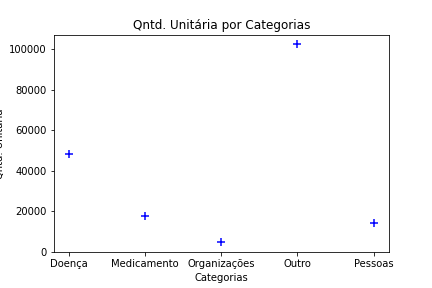

###C√≥digo - Resultado por Categoria

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DuvidasDB = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/DuvidasDB.csv', sep = '|', skiprows = 0, encoding = 'utf-8')

In [11]:
df_categorias = get_item_unico_cont(DuvidasDB, 'categoria')

In [ ]:
#Gera gr√°fico de distribui√ß√£o considerando categorias e 
#a quantidade de perguntas para cada uma delas.

plt.scatter(df_categorias.categoria,
            df_categorias.qntd, 
            color='b', 
            s=70, 
            marker="+")

plt.xlabel('Categorias')
plt.ylabel('Qntd. Unit√°ria')

plt.title('Qntd. Unit√°ria por Categorias')

#plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/categorias_em_qntd.png')

plt.show()

##**An√°lise Geogr√°fica**

####Introdu√ß√£o

De acordo com o gr√°fico abaixo, verifica-se que a maior parte dos tweets foi postada por usu√°rios que estavam no Brasil, com maior concentra√ß√£o nas √°reas litor√¢neas e centro-sul. 

Ainda √© observ√°vel que Europa Ocidental, os Estados Unidos e um pa√≠s localizado no Mar do Caribe concentram perguntas referentes a medicamentos e a doen√ßa em si.

No entanto, o continente africano, assim como a China, cont√©m apenas perguntas n√£o diretamente relacionadas com as categorias Doen√ßa, Medicamento, Organiza√ß√µes e Pessoas. As perguntas, ent√£o, podem envolver contextos diferentes como opini√µes e vis√µes pessoais, a quarentena e os protocolos de seguran√ßa e higiene - distanciamento social, uso de √°lcool gel 70%, lavar as m√£os com frequ√™ncia, uso de m√°scaras, etc.

Em resumo, podemos afirmar que a maior parte das perguntas foi realizada por usu√°rios presentes no Brasil e as categorias de perguntas mais frequentes s√£o, respectivamente:
1.   Doen√ßa
2.   Medicamento
3.   Organiza√ß√µes
4.   Pessoas


geo_mundo_categoria.png

####C√≥digo - Distribui√ß√£o Mundial (Categorias de Perguntas)

In [18]:
#Cria√ß√£o de um dataframe espec√≠fico para an√°lise geogr√°fica.
#df_geo = DuvidasDB[['id', 'categoria', 'idioma', 'pais', 'sigla', 'lugar', 'latitude', 'longitude']].copy()

In [12]:
#Obten√ß√£o de um dataset que cont√©m a geometria de todos os pa√≠ses
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [14]:
#Devolve um dataframe filtrado com a categoria informada
#Se tiver uma coluna geometry, a fun√ß√£o a exclue.

def get_df_geo_categoria(df, categoria):

  if ('geometry' in df):
    df.drop(['geometry'], axis=1, inplace = True)

  return df.query('categoria == @categoria')

In [15]:
#Gera um dataframe (a partir de outro) filtrando por pa√≠s espec√≠fico.

def get_df_geo_pais(df, pais):
  return df.query('pais == @pais')

In [16]:
#Fun√ß√£o geradora de geodataframe

def get_geodataframe(df):
  return GeoDataFrame(df, geometry = gpd.points_from_xy(df.latitude, df.longitude))

In [19]:
#Sele√ß√£o de dataframes organizados por categorias:
#Tamb√©m inclui a exclus√£o da coluna geometry

#Categoria Doen√ßa
df_geo_doenca = get_df_geo_categoria(DuvidasDB, 'Doen√ßa')

#Categoria Medicamento
df_geo_med = get_df_geo_categoria(DuvidasDB, 'Medicamento')

#Categoria Organiza√ß√µes
df_geo_org = get_df_geo_categoria(DuvidasDB, 'Organiza√ß√µes')

#Categoria Pessoas
df_geo_pe = get_df_geo_categoria(DuvidasDB, 'Pessoas')

#Categoria Outro
df_geo_outro = get_df_geo_categoria(DuvidasDB, 'Outro')

In [22]:
#Gera√ß√£o de geodataframes de cada categoria:

gdf_doenca = get_geodataframe(df_geo_doenca)

gdf_med = get_geodataframe(df_geo_med)

gdf_org = get_geodataframe(df_geo_org)

gdf_pe = get_geodataframe(df_geo_pe)

gdf_outro = get_geodataframe(df_geo_outro)

In [ ]:
#Gera gr√°fico de distribui√ß√£o mundial das categorias das perguntas

ax = world.plot(color='white', 
                marker = 'o', 
                edgecolor='grey', 
                markersize = 20,
                figsize=(16, 10))

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doen√ßa')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organiza√ß√µes')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.set_title('Distribui√ß√£o Mundial - Categorias de Perguntas',fontsize=20)
ax.axis('off')

plt.legend(loc = 'center left')
#plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_mundo_categorias.png')
plt.show()

###Perguntas realizadas no Brasil

Como visto anteriormente, o Brasil concentra a maior quantidade de perguntas realizadas por usu√°rios, al√©m de ser o √∫nico pa√≠s no mundo a ter ocorr√™ncias √∫nicas nas categorias Organiza√ß√µes e Pessoas. Essa limita√ß√£o quantitativa pode ter sido causada pela barreira idiom√°tica:
*   Algumas l√≠nguas estrangeiras (japon√™s, por exemplo) n√£o dependem do ponto de interroga√ß√£o para identificar perguntas na escrita. 
*   L√≠nguas n√£o origin√°rias do latim, dificultando a classifica√ß√£o de perguntas.

Portanto, a an√°lise a seguir focar√° nas perguntas postadas por usu√°rios que informaram morar no Brasil. 



####An√°lise Regional

De acordo com o gr√°fico abaixo, podemos afirmar que o Sudeste √© a regi√£o que tende a fazer perguntas de diversos contextos, seguido do Nordeste. Basta lembrar que o Sudeste e Nordeste foram os primeiros locais no Brasil a ter casos suspeitos e confirmados. Tamb√©m devemos considerar que a propaga√ß√£o do v√≠rus foi mais r√°pida por essas regi√µes, pois possuem aeroportos internacionais que possuem grande rotatividade de pessoas, al√©m de serem possuierem pontos tur√≠sticos preferidos. No caso do Sudeste, h√° tamb√©m curiosidade sobre Pessoas e Organiza√ß√µes, pois certos pol√≠ticos locais estavam bem envolvidos com organiza√ß√µes ligadas a sa√∫de e no combate ao coronav√≠rus. 

Comparada com as outras regi√µes, o Centro-Oeste costuma ter mais curiosidade sobre not√≠cias da doen√ßa em si (sintomas, estat√≠sticas, etc.).

As regi√µes Norte e Sul mostram interesses em comum voltados para t√≥picos referentes ao v√≠rus e sua cura. 

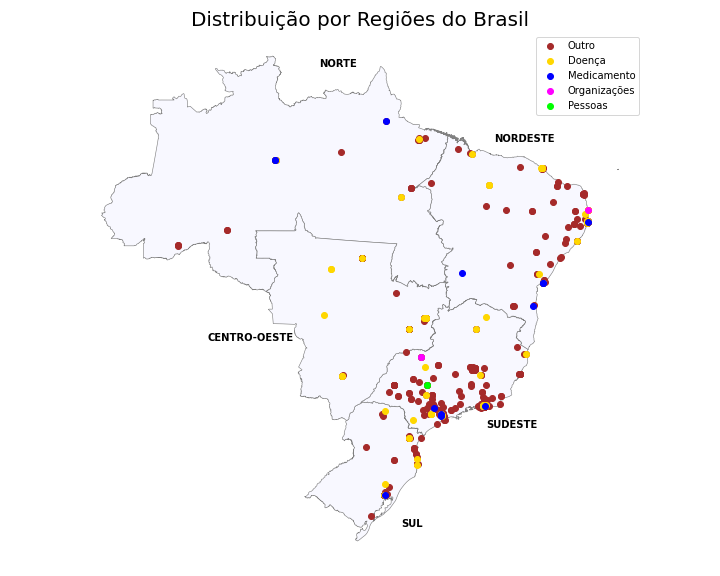

####An√°lise Estadual

Se observarmos a partir de uma vis√£o estadual, percebemos que S√£o Paulo e Rio de Janeiro s√£o os estados onde mais foram feitas perguntas. 

Uma √∫nica pergunta foi feita na categoria Pessoas e ela foi feita por um usu√°rio que estava em S√£o Paulo. 

Para√≠ba e Minas Gerais foram os √∫nicos estados que tenderam a realizar perguntas sobre Organiza√ß√µes.

Nenhuma pergunta foi feita por quem estava em Tocantins e Roraima. Acre e Rond√¥nia apresentam somente perguntas de contexto aberto (categoria Outro).
Isto pode estar ligado com a baixa densidade demogr√°frica, como pode ser conferido no gr√°fico "Distribui√ß√£o por Densidade Demogr√°fica Estadual".

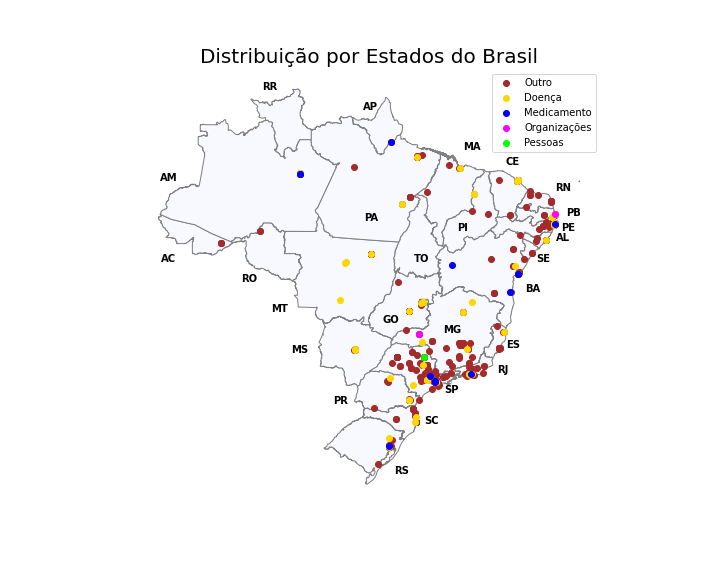

geo_estadual_demografico_brazil (5).png

####C√≥digo - Distribui√ß√£o por Regi√µes do Brasil

In [24]:
#Fun√ß√£o que renderiza textos em mapas
def text(x, y, text):
    ax.text(x, y, text,
            ha='center', va='top', weight='bold', color='black')

In [25]:
#Obten√ß√£o de arquivos shape do Brasil
brazil_regioes = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/regioes_2010.shp')

In [27]:
#Gera√ß√£o de um dataframe reduzido, contendo somente ocorr√™ncias do Brasil.
#df_geo_brazil = get_df_geo_pais(DuvidasDB, 'Brazil')

In [28]:
#Gera√ß√£o de um geodataframe
#gdf_brazil = get_geodataframe(df_geo_brazil)

In [ ]:
#Gera gr√°fico, com divis√≥rias regionais, da distribui√ß√£o
#geogr√°fica das categorias

ax = brazil_regioes.plot(color = 'ghostwhite',
                         linewidth=.6, 
                         marker = 'D',
                         markersize = 50,
                         edgecolor='grey',
                         figsize=(10, 8))

text(-55, 5, "NORTE")
text(-62, -17, "CENTRO-OESTE")
text(-40, -1, "NORDESTE")
text(-41, -24, "SUDESTE")
text(-49, -32, "SUL")

ax = plt.gca()

gdf_outro = get_df_geo_pais(gdf_outro, 'Brazil')
gdf_outro.plot(ax=ax, color='brown', label = 'Outro')

gdf_doenca = get_df_geo_pais(gdf_doenca, 'Brazil')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doen√ßa')

gdf_med = get_df_geo_pais(gdf_med, 'Brazil')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')

gdf_org = get_df_geo_pais(gdf_org, 'Brazil')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organiza√ß√µes')

gdf_pe = get_df_geo_pais(gdf_pe, 'Brazil')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.axis('off')

plt.legend(loc = 'upper right')

ax.set_title('Distribui√ß√£o por Regi√µes do Brasil',fontsize=20)

plt.tight_layout()
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_regional_brazil.png')

####C√≥digo - Distribui√ß√£o por Estados do Brasil

In [31]:
brazil_estados = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/estados_2010.shp')

In [ ]:
#Gera gr√°fico, com divis√≥rias estaduais, da distribui√ß√£o
#geogr√°fica das categorias

ax = brazil_estados.plot(color='ghostwhite', 
                         edgecolor='grey', 
                         marker = 'D',
                         markersize = 50,
                         figsize=(10, 8))

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doen√ßa')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organiza√ß√µes')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

#Colocando tags nos estados
text(-73, -11, "AC")
text(-73, -3, "AM")
text(-63, 6, "RR")
text(-65, -13, "RO")
text(-53, 4, "AP")

text(-53, -7, "PA")
text(-62, -16, "MT")
text(-60, -20, "MS")
text(-56, -25, "PR")
text(-47, -27, "SC")

text(-50, -32, "RS")
text(-43, 0, "MA")
text(-48, -11, "TO")
text(-51, -17, "GO")
text(-45, -24, "SP")

text(-44, -8, "PI")
text(-37, -14, "BA")
text(-45, -18, "MG")
text(-39, -1.5, "CE")
text(-34, -4, "RN")

text(-33, -6.5, "PB")
text(-33.5, -8, "PE")
text(-34, -9, "AL")
text(-36, -11, "SE")
text(-39, -19.5, "ES")
text(-40, -22, "RJ")
#

ax.set_title('Distribui√ß√£o por Estados do Brasil',fontsize=20)
ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_estadual_brazil.png')
plt.show()

####C√≥digo - Distribui√ß√£o por Densidade Demogr√°fica Estadual do Brasil

In [34]:
brazil_municipios = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/municipios_2010.shp')

In [35]:
#A quantidade populacional e √≠ndices estaduais est√£o em formato de string.
#Casting nos valores das colunas √© necess√°rio.

brazil_municipios = brazil_municipios.astype({"populacao":'int64', "estado_id":'int64'}) 

In [37]:
def cont_populacao_estadual(id): #id do estado
  #populacao = []
  cont = 0
  lista = brazil_municipios[brazil_municipios['estado_id'] == id]

  for index, row in lista.iterrows():
    cont = cont + row['populacao']

  return cont

In [38]:
brazil_estados['populacao'] = brazil_estados.apply(lambda row: cont_populacao_estadual(row['id']), axis = 'columns')

In [ ]:
#Gera gr√°fico da distribui√ß√£o das categorias por divis√£o estadual 
#em densidades demogr√°ficas populacionais.

ax = world[world.name == 'Brazil'].plot(color='white', 
                                         edgecolor='grey',
                                         figsize=(10, 8))

brazil_estados.plot(column='populacao',
           cmap='coolwarm',
           legend=True,
           ax=ax)

gdf_outro.plot(ax=ax, color='black', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doen√ßa')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organiza√ß√µes')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

#Colocando tags nos estados
text(-73, -11, "AC")
text(-73, -3, "AM")
text(-63, 6, "RR")
text(-65, -13, "RO")
text(-53, 4, "AP")

text(-53, -7, "PA")
text(-62, -16, "MT")
text(-60, -20, "MS")
text(-56, -25, "PR")
text(-47, -27, "SC")

text(-50, -32, "RS")
text(-43, 0, "MA")
text(-48, -11, "TO")
text(-51, -17, "GO")
text(-45, -24, "SP")

text(-44, -8, "PI")
text(-37, -14, "BA")
text(-45, -18, "MG")
text(-39, -1.5, "CE")
text(-34, -4, "RN")

text(-33, -6.5, "PB")
text(-33.5, -8, "PE")
text(-34, -9, "AL")
text(-36, -11, "SE")
text(-39, -19.5, "ES")
text(-40, -22, "RJ")

ax.set_title('Distribui√ß√£o por Densidade Demogr√°fica Estadual',fontsize=20)
ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_estadual_demografico_brazil.png')
plt.show()

##**An√°lise Temporal**


A respeito da rela√ß√£o quantidade de tweets por m√™s, temos o seguinte gr√°fico em barras:

In [ ]:
df_original['mes'] = pd.DatetimeIndex(df_original['data']).month

In [ ]:
df_tweets_mes = df_original['mes'].value_counts().to_frame()
df_tweets_mes = df_tweets_mes.rename(columns = {'mes':'qntd_mes'})
df_tweets_mes['num_mes'] = df_tweets_mes.index
df_tweets_mes.reset_index(drop=True, inplace=True)
df_tweets_mes = df_tweets_mes.sort_values(by='num_mes')

In [ ]:
def defineNomeMes(num_mes):
  if (num_mes == 1):
    return 'Janeiro'
  elif (num_mes == 2):
    return 'Fevereiro'
  elif (num_mes == 3):
    return 'Mar√ßo'
  elif (num_mes == 4):
    return 'Abril'
  elif (num_mes == 5):
    return 'Maio'
  elif (num_mes == 6):
    return 'Junho'
  elif (num_mes == 7):
    return 'Julho'
  else:
    return 'outro'

In [ ]:
df_tweets_mes['nome_mes'] = df_tweets_mes.apply(lambda row: defineNomeMes(row['num_mes']), axis = 'columns')

In [ ]:
#Quantidade de Tweets x m√™s

plt.bar(df_tweets_mes.nome_mes, df_tweets_mes.qntd_mes)
plt.title('Qntd. de Tweets x M√™s')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Tweets')
plt.savefig('qntd_tweets_por_mes_df_original.png')
plt.show()

No gr√°fico acima, podemos observar que:

*   Conforme a COVID-19 √© espalhada no exterior a quantidade de tweets sobre o assunto aumenta.
*   Chega ao pico no m√™s de mar√ßo, onde diversas metr√≥poles come√ßam a anunciar casos suspeitos e confirmados. 
*   Em abril ainda temos um n√∫mero alto de postagens. Trata-se do per√≠odo em que cidades iniciam o per√≠odo de quarentena e refor√ßam mensagens do protocolo de distanciamento social e higiene. 
*   No m√™s seguinte, h√° uma queda de aproximadamente 39,68%. Pode-se supor que a queda se d√° pela transfer√™ncia da men√ß√£o textual ao v√≠rus para men√ß√µes audiovisuais (memes e v√≠deos, por exemplo), abordagens indiretas referentes a pandemia, quarentena e pelo emprego dos protocolos de higiene e distantiamento social estipulados mundialmente. 

### Defini√ß√£o dos dataframes


BRAINSTORM
*   Agrupar por dia
*   Agrupar por periodo do dia (dia, tarde, noite)
*   buscar as datas dos pronunciamento do bolsonaro
*   Agrupar por categoria




In [ ]:
#  dataframe
df_copy = df_copia_original.copy() #df_reduzida
df_duvidas_copy = df_duvidas.copy()

In [ ]:
# convert coluna data de object para datatime
# pd.to_datetime(pd.Series(['05/23/2005']))
df_copy.data= pd.to_datetime(df_copy.data)
df_duvidas_copy.data= pd.to_datetime(df_duvidas_copy.data)

### Dataframe geral

In [ ]:
# Transformando o datetime em index
df_copy.set_index('data', inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1658825 entries, 2020-03-23 18:51:14 to 2020-06-02 16:04:51
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   usuario     1658768 non-null  object 
 1   apelido     1658825 non-null  object 
 2   texto       1658825 non-null  object 
 3   retweet     1658825 non-null  int64  
 4   seguidores  1658825 non-null  int64  
 5   idioma      1658825 non-null  object 
 6   lugar       74605 non-null    object 
 7   pais        74600 non-null    object 
 8   sigla       74595 non-null    object 
 9   latitude    8720 non-null     float64
 10  longitude   8720 non-null     float64
 11  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 164.5+ MB


In [ ]:
df_copy.retweet.plot(figsize=(15, 6))

### Dataframe Perguntas

In [ ]:
# M√©todo para agrupar os dataframes por cada categoria
#  h ‚Üí hora | d ‚Üí dia
def count_categoria_por_dia(df, categoria, f_floor='d'):
  df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
  df[['data', 'categoria']].groupby(['data', 'categoria']).count()

  df = (pd.to_datetime(df_outro['data'])
        .dt.floor(f_floor)
        .value_counts()
        .rename_axis('date')
        .reset_index(name='count'))

  df.date = pd.to_datetime(df.date)
  return df

df1 = count_categoria_por_dia(df_duvidas_copy, 'Medicamento')
df2 = count_categoria_por_dia(df_duvidas_copy, 'Doen√ßa')
# categorias = ['Medicamento', 'Doen√ßa', 'Pessoas', 'Organiza√ß√µes', 'Outro']

plt.bar(df1['date'], df1['count'], label='Medicamento', color='r')
plt.bar(df2['date'], df2['count'], label='Doen√ßa', color='b')

plt.legend()

plt.xlabel('Datas')
plt.ylabel('Quantidade por categoria')

plt.title = 'Thalita teste'

plt.show()

NameError: ignored